In [36]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/Timeseries-data.csv")

In [34]:
df['Date Time'] = pd.to_datetime(df['Date Time'])
data = df[(df["Date Time"] < pd.to_datetime('20090801'))]

In [35]:
data

,Date Time,P,Rho,T
0,2009-01-01 00:10:00,996.52,1307.75,-8.02
1,2009-01-01 00:20:00,996.57,1309.80,-8.41
2,2009-01-01 00:30:00,996.53,1310.24,-8.51
3,2009-01-01 00:40:00,996.51,1309.19,-8.31
4,2009-01-01 00:50:00,996.51,1309.00,-8.27
...,...,...,...,...
49096,2009-07-12 23:10:00,982.90,1236.37,3.03
49097,2009-07-12 23:20:00,982.73,1234.44,3.40
49098,2009-07-12 23:30:00,982.53,1231.59,3.95
49099,2009-07-12 23:40:00,982.36,1228.65,4.54


In [46]:
look_back = 5
train_size = int(len(data)*0.8)
test_size = len(data) - train_size

train, test = data[0:train_size], data[train_size-look_back:len(data)]

# USE T to predict 

In [38]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
warnings.filterwarnings("ignore")

train_out = array(train["T"])
test_out = array(test["T"])

In [39]:
n_input = 2
generator = TimeseriesGenerator(train_out, train_out, length=n_input, batch_size=5)
print('length:',len(generator))
 
# Define model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(generator, steps_per_epoch=1, epochs=200, verbose=0)


length: 4884


In [40]:
def list_split(items, n):
    return [items[i:i+n] for i in range(0, len(items), n)]

In [41]:
test = list_split(test_out, 2)
print(test)

[array([20.2 , 20.23]), array([20.28, 20.7 ]), array([20.81, 20.77]), array([20.68, 20.83]), array([21.1 , 20.81]), array([21.16, 22.04]), array([22.02, 21.66]), array([21.38, 20.48]), array([18.55, 17.32]), array([16.5 , 17.32]), array([17.74, 17.47]), array([17.79, 17.63]), array([16.69, 15.47]), array([15.04, 15.46]), array([15.59, 15.42]), array([15.55, 15.72]), array([15.77, 16.01]), array([16.13, 16.26]), array([16.31, 16.28]), array([16.11, 16.05]), array([16.3 , 15.81]), array([15.34, 15.01]), array([15.37, 15.38]), array([15.07, 14.82]), array([14.83, 14.89]), array([15.16, 15.03]), array([14.7 , 14.49]), array([14.55, 14.59]), array([14.83, 14.88]), array([14.76, 14.77]), array([14.69, 14.6 ]), array([14.59, 14.32]), array([14.  , 13.75]), array([13.62, 13.52]), array([13.46, 13.5 ]), array([13.55, 13.61]), array([13.54, 13.45]), array([13.55, 13.31]), array([13.35, 13.47]), array([13.47, 13.02]), array([12.97, 13.07]), array([13.04, 12.95]), array([12.88, 12.87]), array([12.

In [43]:
import array as arr 
arr1 = np.empty_like(test)

for i in range(len(test)-1):
  x_input = test[i].reshape((1, n_input))
  y_output = model.predict(x_input, verbose=0)
  arr1 = np.insert(arr1,i, y_output,0)

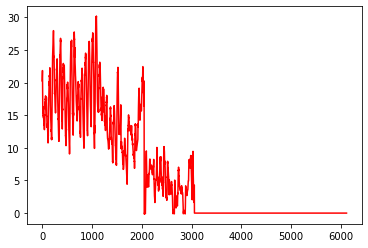

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(arr1,color='red')

plt.show()

# Use P and Rho to Predict T

In [47]:
from numpy import array
from numpy import insert
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
warnings.filterwarnings("ignore")

train1 = array(train["P"])
train2 = array(train["Rho"])
train_out = array(train["T"])

test1 = array(test["P"])
test2 = array(test["Rho"])
test_out = array(test["T"])
# Reshape series
train1 = train1.reshape((len(train1), 1))
train2 = train2.reshape((len(train2), 1))
train_out = train_out.reshape((len(train_out), 1))

test1 = test1.reshape((len(test1), 1))
test2 = test2.reshape((len(test2), 1))
test_out = test_out.reshape((len(test_out), 1))

dataset = hstack((train1, train2))
Tdataset = hstack((test1, test2))
print(dataset)


[[ 996.52 1307.75]
 [ 996.57 1309.8 ]
 [ 996.53 1310.24]
 ...
 [ 987.07 1165.47]
 [ 986.84 1163.51]
 [ 986.83 1163.04]]


In [48]:
train_data_gen = TimeseriesGenerator(dataset, train_out, length=look_back, sampling_rate=1,stride=1,batch_size=3)
print(len(train_data_gen))
print(train_data_gen[0])

8139
(array([[[ 996.52, 1307.75],
        [ 996.57, 1309.8 ],
        [ 996.53, 1310.24],
        [ 996.51, 1309.19],
        [ 996.51, 1309.  ]],

       [[ 996.57, 1309.8 ],
        [ 996.53, 1310.24],
        [ 996.51, 1309.19],
        [ 996.51, 1309.  ],
        [ 996.5 , 1307.86]],

       [[ 996.53, 1310.24],
        [ 996.51, 1309.19],
        [ 996.51, 1309.  ],
        [ 996.5 , 1307.86],
        [ 996.5 , 1305.68]]]), array([[-8.05],
       [-7.62],
       [-7.62]]))


In [49]:
test_data_gen = TimeseriesGenerator(Tdataset,test_out,length=look_back,sampling_rate=1,stride=1,batch_size=1)
print(len(test_data_gen))
print(test_data_gen[0])

6106
(array([[[ 987.02, 1165.6 ],
        [ 987.06, 1165.63],
        [ 987.07, 1165.47],
        [ 986.84, 1163.51],
        [ 986.83, 1163.04]]]), array([[20.77]]))


In [52]:
model = Sequential()
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(train_data_gen,epochs=50, verbose=0)

In [ ]:
model.evaluate(test_data_gen)

In [ ]:
trainPredict = model.predict(train_data_gen)
trainPredict.shape

In [ ]:
testPredict = model.predict(test_data_gen)
testPredict.shape

In [ ]:
def get_y_from_generator(gen):
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [ ]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset), :] = testPredict

In [ ]:
plt.plot(data["T"])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()